In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.0'

In [3]:
imdb = tf.keras.datasets.imdb.load_data(path="imdb.npz",num_words=10000)

In [4]:
imdb

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 194, 1153, 194, 8255, 78, 

In [5]:
(x_train, y_train), (x_test, y_test) = imdb
#chciałem inaczej ale podobno lepiej 50/50

In [6]:
print(x_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [7]:
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)


In [8]:
import numpy as np
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [9]:
print("words in total: ")
print(len(np.unique(np.hstack(X))))

words in total: 
9998


In [10]:
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D
model = tf.keras.Sequential()
model.add(Embedding(input_dim=10000,output_dim=15, input_length=100))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='valid', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))


In [11]:
#adam zmienia wagi podczas treningu
opt ='adam'
loss = 'binary_crossentropy'
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 15)           150000    
                                                                 
 dropout (Dropout)           (None, 100, 15)           0         
                                                                 
 conv1d (Conv1D)             (None, 99, 32)            992       
                                                                 
 dropout_1 (Dropout)         (None, 99, 32)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                        

In [13]:
epochs_num = 2
batch_size = 100
validation_split = 0.25

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_pads = pad_sequences(x_train, maxlen=100, value = 0.0)
x_test_pads = pad_sequences(x_test, maxlen=100, value = 0.0) 


In [14]:
epochs = 99
split = 0.25

model_fit=model.fit(
    x_train_pads, 
    y_train, 
    epochs=epochs, 
    batch_size=100, 
    validation_split=split,
    validation_data=(x_test_pads,y_test)
)

Epoch 1/99
250/250 [==============================] - 4s 15ms/step - loss: 0.6894 - accuracy: 0.5348 - val_loss: 0.6721 - val_accuracy: 0.6532
Epoch 2/99
250/250 [==============================] - 4s 15ms/step - loss: 0.4964 - accuracy: 0.7624 - val_loss: 0.3795 - val_accuracy: 0.8430
Epoch 3/99
250/250 [==============================] - 4s 15ms/step - loss: 0.3409 - accuracy: 0.8513 - val_loss: 0.3474 - val_accuracy: 0.8496
Epoch 4/99
250/250 [==============================] - 4s 14ms/step - loss: 0.2986 - accuracy: 0.8750 - val_loss: 0.3400 - val_accuracy: 0.8481
Epoch 5/99
250/250 [==============================] - 4s 15ms/step - loss: 0.2662 - accuracy: 0.8904 - val_loss: 0.3458 - val_accuracy: 0.8454
Epoch 6/99
250/250 [==============================] - 4s 15ms/step - loss: 0.2479 - accuracy: 0.8983 - val_loss: 0.3543 - val_accuracy: 0.8411
Epoch 7/99
250/250 [==============================] - 4s 14ms/step - loss: 0.2354 - accuracy: 0.9058 - val_loss: 0.3593 - val_accuracy: 0.8393

Epoch 58/99
250/250 [==============================] - 4s 15ms/step - loss: 0.1292 - accuracy: 0.9477 - val_loss: 0.5902 - val_accuracy: 0.8106
Epoch 59/99
250/250 [==============================] - 4s 15ms/step - loss: 0.1304 - accuracy: 0.9477 - val_loss: 0.5897 - val_accuracy: 0.8110
Epoch 60/99
250/250 [==============================] - 4s 15ms/step - loss: 0.1293 - accuracy: 0.9467 - val_loss: 0.5906 - val_accuracy: 0.8101
Epoch 61/99
250/250 [==============================] - 4s 15ms/step - loss: 0.1303 - accuracy: 0.9482 - val_loss: 0.5903 - val_accuracy: 0.8109
Epoch 62/99
250/250 [==============================] - 4s 16ms/step - loss: 0.1272 - accuracy: 0.9485 - val_loss: 0.5972 - val_accuracy: 0.8102
Epoch 63/99
250/250 [==============================] - 4s 15ms/step - loss: 0.1292 - accuracy: 0.9489 - val_loss: 0.5994 - val_accuracy: 0.8114
Epoch 64/99
250/250 [==============================] - 4s 14ms/step - loss: 0.1319 - accuracy: 0.9467 - val_loss: 0.5930 - val_accuracy:

In [15]:
test = model.evaluate(x_test_pads, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.6304 - accuracy: 0.8070


In [16]:
print("loss = ",test[0])
print("mean loss:", np.mean(model_fit.history["val_loss"]))

loss =  0.6303662657737732
mean loss: 0.5472997074777429


In [17]:
print("acc = ",test[1])
print("mean acc:", np.mean(model_fit.history["val_accuracy"]))

acc =  0.8069999814033508
mean acc: 0.812951512408979


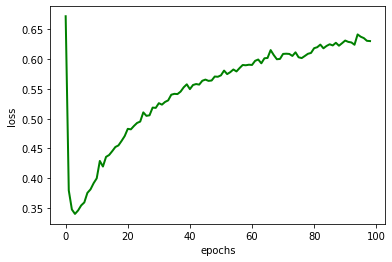

In [18]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['val_loss'],linewidth=2,color='green')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()



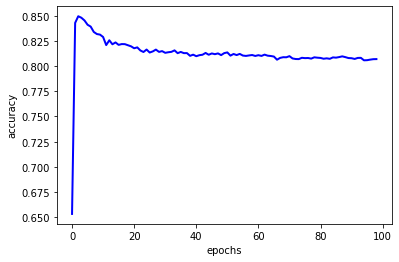

In [19]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['val_accuracy'],linewidth=2,color='blue')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

In [20]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import string



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bsosn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
word2index = tf.keras.datasets.imdb.get_word_index()
test=[]
for word in word_tokenize( "i really like this movie"):
     test.append(word2index[word])

test=pad_sequences([test],maxlen=100)
preds = model.predict(test)
    


1/1 [==============================] - 0s 16ms/step


In [22]:
print(preds)

[[0.66029996]]


In [23]:
word2index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,